# Pareto Front
Parses results and plots a pareto front to visualize cost function.

## Environment setup

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns # for colors
from paretoset import paretoset

# specify plot settings such as figure size and font
plt.rcParams["figure.figsize"] = [7,4]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

## Import and parse results

In [2]:
# import results using geopandas and create subsets

results = []
results.append(gpd.read_file("env_bruteforce_20230325_014623_0.1_5cages.geojson"))    # [0] all results

# divide all relevant columns by 1M to scale axis correctly
results[0]['wec_cost_NPV [$]'] = results[0]['wec_cost_NPV [$]'].div(1000000)
results[0]['vessel_travel_cost_NPV [$]'] = results[0]['vessel_travel_cost_NPV [$]'].div(1000000)
results[0]['obj_func'] = results[0]['obj_func'].div(1000000)

results.append(results[0][results[0]['ok-conditions'] == '1'])                        # [1] results with data available
results.append(results[0][results[0]['valid_point'] == '1'])                          # [2] results that meet all constraints
results.append(results[2][results[2]["wec_cost_NPV [$]"] < 1000])                     # [3] results that meet all constraints minus outliers

In [3]:
# calculate optimal site and utopia point for each set

utopia = []
for res in results:
    utopia.append((res["wec_cost_NPV [$]"].min(), res["vessel_travel_cost_NPV [$]"].min()))
    
optimal = results[3][results[3]['obj_func']==results[3]['obj_func'].min()]

In [4]:
# calculate non-dominated pareto results for each set

pareto = []
for res in results:
    set = res[["wec_cost_NPV [$]", "vessel_travel_cost_NPV [$]"]]
    mask = paretoset(set, sense=["min", "min"])
    pareto.append(res[mask])

## Aimple plot of one of the results
Adjust *i* to change result plotted

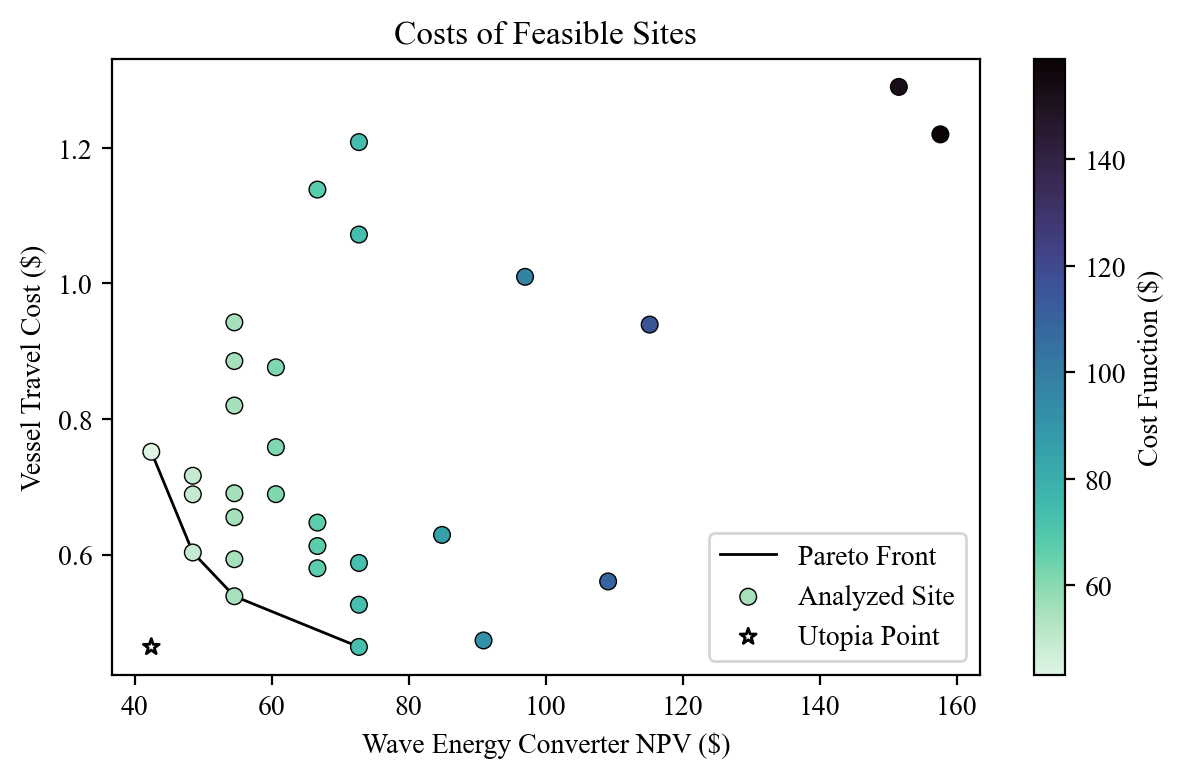

In [5]:
fig, ax = plt.subplots()

i = 3
cmap = sns.color_palette("mako_r", as_cmap=True)
norm = mpl.colors.Normalize()

ax.plot(pareto[i].sort_values("wec_cost_NPV [$]")["wec_cost_NPV [$]"],
        pareto[i].sort_values("wec_cost_NPV [$]")["vessel_travel_cost_NPV [$]"],
        color='black', linewidth=1, label='Pareto Front', zorder=1)
ax.scatter(results[i]["wec_cost_NPV [$]"],
                 results[i]["vessel_travel_cost_NPV [$]"],
                 c=results[i]["obj_func"],
                 edgecolors='black', linewidth=0.5,
                 cmap=cmap, norm=norm, label='Analyzed Site', zorder=2)
ax.scatter(utopia[i][0], utopia[i][1], marker='*',
           edgecolors='black', linewidth=1, facecolor='none',
           label='Utopia Point', zorder=3)

ax.set_xlabel("Wave Energy Converter NPV ($)")
ax.set_ylabel("Vessel Travel Cost ($)")
ax.set_title("Costs of Feasible Sites")
ax.legend()

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Cost Function ($)")

plt.show()

## Plot overall non-dominated results and all feasible results with annotations

/usr/local/anaconda3/envs/imta/lib/python3.9/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/usr/local/anaconda3/envs/imta/lib/python3.9/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/usr/local/anaconda3/envs/imta/lib/python3.9/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/usr/local/anaconda3/envs/imta/lib/python3.9/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(s

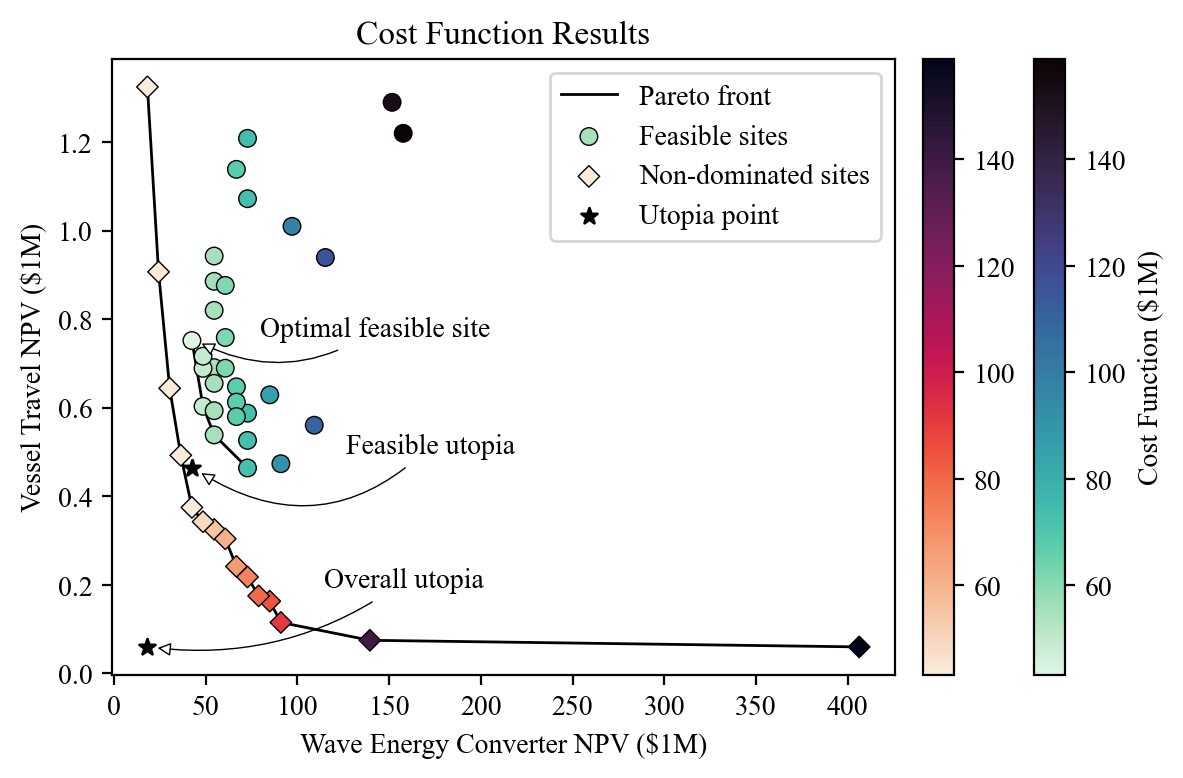

In [6]:
fig, ax = plt.subplots()

mako = sns.color_palette("mako_r", as_cmap=True)
rocket = sns.color_palette("rocket_r", as_cmap=True)
norm = mpl.colors.Normalize()

# pareto of feasible sites
ax.plot(pareto[3].sort_values("wec_cost_NPV [$]")["wec_cost_NPV [$]"],
        pareto[3].sort_values("wec_cost_NPV [$]")["vessel_travel_cost_NPV [$]"],
        color='black', linewidth=1, zorder=1)
# pareto of non-dominated sites
ax.plot(pareto[1].sort_values("wec_cost_NPV [$]")["wec_cost_NPV [$]"],
        pareto[1].sort_values("wec_cost_NPV [$]")["vessel_travel_cost_NPV [$]"],
        color='black', linewidth=1, label='Pareto front', zorder=1)

# scatter of feasible sites
ax.scatter(results[3]["wec_cost_NPV [$]"],
                 results[3]["vessel_travel_cost_NPV [$]"],
                 c=results[3]["obj_func"],
                 edgecolors='black', linewidth=0.5, marker="o", s=40,
                 cmap=mako, norm=norm, label='Feasible sites', zorder=2)
# scatter of non-dominated sites
ax.scatter(pareto[1]["wec_cost_NPV [$]"],
           pareto[1]["vessel_travel_cost_NPV [$]"],
                 c=pareto[1]["obj_func"],
                 edgecolors='black', linewidth=0.5, marker="D", s=30,
                 cmap=rocket, norm=norm, label='Non-dominated sites', zorder=2)


# utopia feasible sites
ax.scatter(utopia[3][0], utopia[3][1], marker='*',
           edgecolors='black', linewidth=1, facecolor='black', zorder=1)
ax.annotate("Feasible utopia", xy=(utopia[3][0]+2.5, utopia[3][1]-0.005), xycoords='data',
            xytext=(utopia[3][0]+130, utopia[3][1]+0.05), textcoords='data',
            size=10, va="center", ha="center",
            arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3, rad=-0.4", fc="w", linewidth=0.5))

# utopia for non-dominated sites
ax.scatter(utopia[1][0], utopia[1][1], marker='*',
           edgecolors='black', linewidth=1, facecolor='black', label='Utopia point', zorder=1)
ax.annotate("Overall utopia", xy=(utopia[1][0]+2.5, utopia[1][1]-0.001), xycoords='data',
            xytext=(utopia[1][0]+140, utopia[1][1]+0.15), textcoords='data',
            size=10, va="center", ha="center",
            arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3, rad=-0.2", fc="w", linewidth=0.5))

ax.annotate("Optimal feasible site", xy=(optimal["wec_cost_NPV [$]"]+2.5, optimal["vessel_travel_cost_NPV [$]"]-0.001), xycoords='data',
            xytext=(optimal["wec_cost_NPV [$]"]+100, optimal["vessel_travel_cost_NPV [$]"]+0.025), textcoords='data',
            size=10, va="center", ha="center",
            arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3, rad=-0.3", fc="w", linewidth=0.5))

ax.set_xlabel("Wave Energy Converter NPV ($1M)")
ax.set_ylabel("Vessel Travel NPV ($1M)")
ax.set_title("Cost Function Results")
ax.legend()

cbar1 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=mako), ax=ax, pad=-0.03, label="Cost Function ($1M)")
cbar2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=rocket), ax=ax, pad=0.03)

plt.savefig("pareto-all.png", dpi=300)
plt.show()

## View feasible sites as table

In [7]:
results[3]

,pos_long,pos_lat,ok-conditions,ok-scope,ok-conflicts,obj_func,valid_point,aqua_energy [kWh],cost_per_yield [$/kg],env_O2_min_cons,...,fish_yield_cons,travel_distance [km],vessel_travel_cost_NPV [$],wave_power [kW/m],wec_AEP_per_unit [kWh],wec_LCOE [$/kWh],wec_P_ave [kW],wec_cost_NPV [$],wec_number [-],geometry
5474,-69.0,43.7,1,1,1,55.256517,1,515511.792509,61.311358,5.380136,...,5208.883612,83.216586,0.690567,3042.590609,57279.088057,10.907122,6.534233,54.565950,9.0,POINT (-69.00000 43.70000)
5475,-68.9,43.7,1,1,1,49.192037,1,515511.792509,54.582350,5.382434,...,21316.955027,83.024094,0.688970,3461.700001,64438.974064,9.695220,7.351012,48.503067,8.0,POINT (-68.90000 43.70000)
5572,-69.4,43.8,1,1,1,73.342385,1,515511.792509,81.379019,5.381966,...,1907.476636,70.830789,0.587784,2160.024538,42959.316042,14.542829,4.900675,72.754600,12.0,POINT (-69.40000 43.80000)
5573,-69.3,43.8,1,1,1,67.338994,1,515511.792509,74.717796,5.385212,...,13474.015385,78.000000,0.647278,2306.069362,46864.708410,13.330927,5.346191,66.691717,11.0,POINT (-69.30000 43.80000)
5575,-69.1,43.8,1,1,1,67.304468,1,515511.792509,74.679486,5.390798,...,33943.235697,73.839359,0.612751,2362.548759,46864.708410,13.330927,5.346191,66.691717,11.0,POINT (-69.10000 43.80000)
5578,-68.8,43.8,1,1,1,49.106289,1,515511.792509,54.487206,5.395761,...,68240.135069,72.691125,0.603222,3169.512276,64438.974064,9.695220,7.351012,48.503067,8.0,POINT (-68.80000 43.80000)
5784,-68.6,44.0,1,1,1,73.218589,1,515511.792509,81.241659,5.416182,...,119274.082143,55.912879,0.463989,2149.835672,42959.316042,14.542829,4.900675,72.754600,12.0,POINT (-68.60000 44.00000)
5786,-68.4,44.0,1,1,1,55.104661,1,515511.792509,61.142862,5.415125,...,121737.735712,64.917250,0.538711,3072.765032,57279.088057,10.907122,6.534233,54.565950,9.0,POINT (-68.40000 44.00000)
5889,-68.3,44.1,1,1,1,73.280815,1,515511.792509,81.310703,5.421409,...,159255.511261,63.411355,0.526215,2160.207854,42959.316042,14.542829,4.900675,72.754600,12.0,POINT (-68.30000 44.10000)
5890,-68.2,44.1,1,1,1,67.271717,1,515511.792509,74.643147,5.420469,...,154957.520593,69.892773,0.580000,2378.476037,46864.708410,13.330927,5.346191,66.691717,11.0,POINT (-68.20000 44.10000)
